# Predict whether income exceeds 50K/yr based on census data

# Importing the Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Importing the Dataset

In [2]:
df=pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
# let we check the null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [5]:
# it showing that their is no null values present in the data but thir is a ? in the data
# insted of printing the nan (its showing ?) will replace the ? with most frequent number

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Now will replace '?' to nan 

In [7]:
df.replace("?",np.nan,inplace=True)

In [8]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Will divide the data into dependent variable and independent variable

In [9]:
x=df.iloc[:,:-1].values     # only predictors 
y=df.iloc[:,-1].values      # only target variable

In [10]:
print(x)

[[90 nan 77053 ... 4356 40 'United-States']
 [82 'Private' 132870 ... 4356 18 'United-States']
 [66 nan 186061 ... 4356 40 'United-States']
 ...
 [40 'Private' 154374 ... 0 40 'United-States']
 [58 'Private' 151910 ... 0 40 'United-States']
 [22 'Private' 201490 ... 0 20 'United-States']]


In [11]:
print(y)

['<=50K' '<=50K' '<=50K' ... '>50K' '<=50K' '<=50K']


# 

# Data Preprocessing

## Dataset Cleaning

In [12]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer.fit(x[:,1:])
x[:,1:]=imputer.transform(x[:,1:])

In [13]:
x

array([[90, 'Private', 77053, ..., 4356, 40, 'United-States'],
       [82, 'Private', 132870, ..., 4356, 18, 'United-States'],
       [66, 'Private', 186061, ..., 4356, 40, 'United-States'],
       ...,
       [40, 'Private', 154374, ..., 0, 40, 'United-States'],
       [58, 'Private', 151910, ..., 0, 40, 'United-States'],
       [22, 'Private', 201490, ..., 0, 20, 'United-States']], dtype=object)

In [14]:
# you can see now their is no null value present in the data
# it has been replaced with most_frequent value

In [15]:
# In the data their is non numeric value where machine learning algorithm won't understand the non numeric values so will convert it in to numeric
# will perform Label Encoding operation here to convert the object datatype to int

## Label Encoding

In [16]:
# now let we see for what are the features we want to perform label encoding operation

In [17]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [18]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le3=LabelEncoder()
le5=LabelEncoder()
le6=LabelEncoder()
le7=LabelEncoder()
le8=LabelEncoder()
le9=LabelEncoder()
le13=LabelEncoder()
le=LabelEncoder()
x[:,1]=le1.fit_transform(x[:,1])
x[:,3]=le3.fit_transform(x[:,3])
x[:,5]=le5.fit_transform(x[:,5])
x[:,6]=le6.fit_transform(x[:,6])
x[:,7]=le7.fit_transform(x[:,7])
x[:,8]=le8.fit_transform(x[:,8])
x[:,9]=le9.fit_transform(x[:,9])
x[:,13]=le13.fit_transform(x[:,13])
y=le.fit_transform(y)

In [19]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [20]:
print(x)

[[90 3 77053 ... 4356 40 38]
 [82 3 132870 ... 4356 18 38]
 [66 3 186061 ... 4356 40 38]
 ...
 [40 3 154374 ... 0 40 38]
 [58 3 151910 ... 0 40 38]
 [22 3 201490 ... 0 20 38]]


In [21]:
print(y)

[0 0 0 ... 1 0 0]


# Data Visualization

In [22]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [23]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [24]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

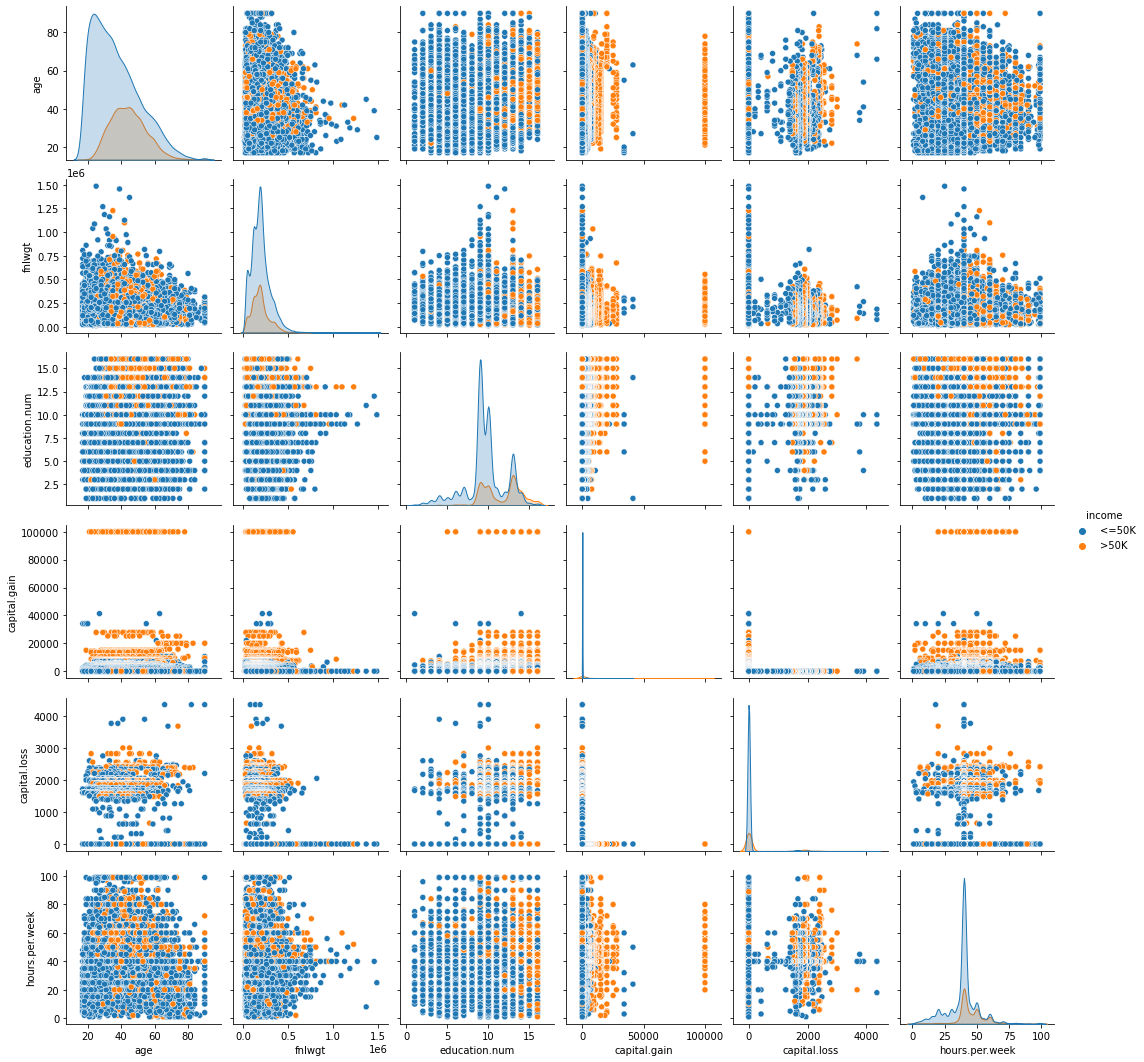

In [25]:
sns.pairplot(df,hue='income')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<AxesSubplot:xlabel='age', ylabel='income'>

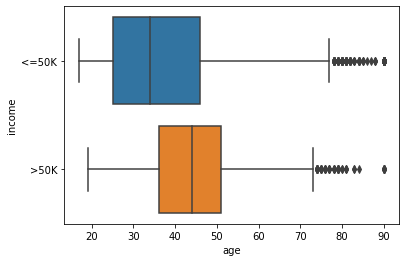

In [27]:
sns.boxplot('age','income',data=df)

In [28]:
numeric=df.describe(include='int').columns

In [29]:
df[numeric]

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
...,...,...,...,...,...,...
32556,22,310152,10,0,0,40
32557,27,257302,12,0,0,38
32558,40,154374,9,0,0,40
32559,58,151910,9,0,0,40


In [30]:
df.columns[:-1]

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'],
      dtype='object')

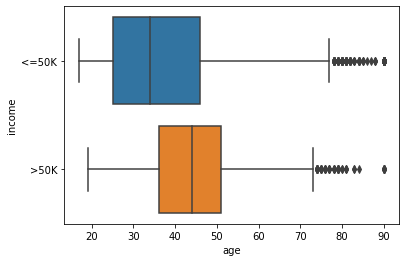

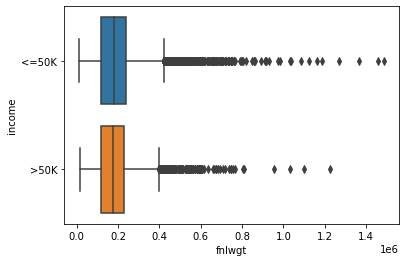

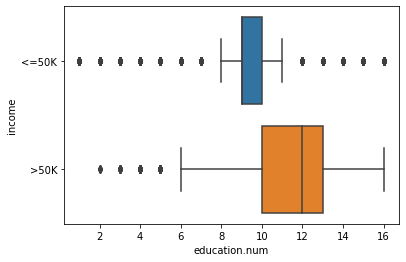

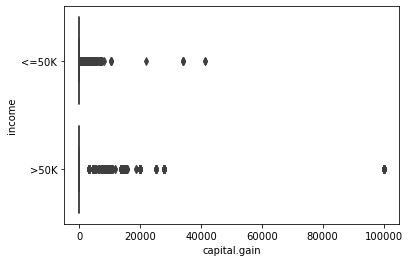

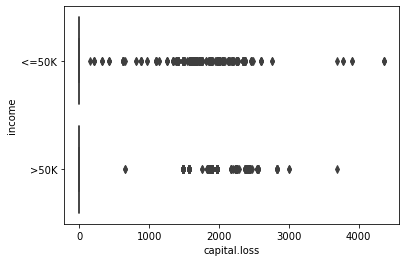

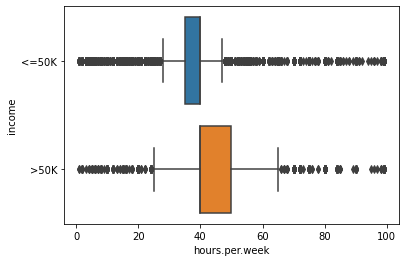

In [31]:
import matplotlib.pyplot as plt
for i in numeric:
    sns.boxplot(i,'income',data=df)
    plt.show()

# 

## Now will split the dataset into Training set and Testing set

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
print('Shape of X_train =',X_train.shape)
print('Shape of X_test =',X_test.shape)
print('Shape of y_train =',y_train.shape)
print('Shape of y_test =',y_test.shape)


Shape of X_train = (26048, 14)
Shape of X_test = (6513, 14)
Shape of y_train = (26048,)
Shape of y_test = (6513,)


In [34]:
# lot data is not in the same scalling so will perform feature scaling operation here

# Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [36]:
X_train

array([[ 0.17780667, -0.08668238,  0.17324388, ..., -0.21852035,
         0.85163208,  0.2622766 ],
       [-0.99324468, -1.88509156,  0.01823791, ..., -0.21852035,
        -1.2548683 ,  0.2622766 ],
       [-0.99324468, -0.08668238, -0.09236999, ..., -0.21852035,
        -0.03957962,  0.2622766 ],
       ...,
       [-0.92005397, -0.08668238, -1.30388022, ..., -0.21852035,
         0.85163208,  0.2622766 ],
       [ 0.39737879, -0.08668238, -0.70533743, ..., -0.21852035,
        -0.03957962,  0.2622766 ],
       [ 0.03142525, -0.08668238,  0.32628501, ..., -0.21852035,
        -0.03957962,  0.2622766 ]])

In [37]:
# Now you can see that the data has been scaled down all the data having in the same range

# Now Will Build the Model 

# Model 1 [XGB Classifier]

In [38]:
from xgboost import XGBClassifier
model1=XGBClassifier()
model1.fit(X_train,y_train)

[16:10:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
y_pred1=model1.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Confusion Matrix

In [41]:
print(confusion_matrix(y_test,y_pred1))

[[4654  312]
 [ 554  993]]


# Classification Report

In [42]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4966
           1       0.76      0.64      0.70      1547

    accuracy                           0.87      6513
   macro avg       0.83      0.79      0.81      6513
weighted avg       0.86      0.87      0.86      6513



# Accuracy Score

In [43]:
print(accuracy_score(y_test,y_pred1))

0.8670351604483341


In [44]:
proba1=model1.predict_proba(X_test)[:,1]

In [45]:
from sklearn import metrics
from sklearn.metrics import roc_curve
fpr1,tpr1,thresholds1=metrics.roc_curve(y_test,proba1)

# Area Under Curve[AUC]

In [46]:
auc=metrics.auc(fpr1,tpr1)
print(auc)

0.9206852231893098


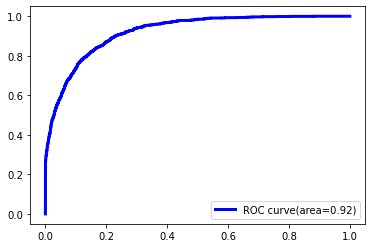

In [47]:
import matplotlib.pyplot as plt

plt.plot(fpr1,tpr1,color='blue',lw=3,label='ROC curve(area=%.2f)'% auc)
plt.legend(loc='best')
plt.show()